In [1]:
%cd C:\Users\yukir\Documents\GitHub\Scrapper\py

from nlp_processing import *
set_global_determinism(seed=1337)

%cd C:\Users\yukir\Documents\Monicas_workspace\Korea_medicine

C:\Users\yukir\Documents\GitHub\Scrapper\py
True
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8758345201443492837
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 5736370209085338022
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9883535296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1346339856519598968
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 3347632889159750366
physical_device_desc: "device: XLA_GPU device"
]
tf 2.2.0
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
C:\Users\yukir\Documents\Monicas_workspace\Korea_medicine


In [6]:
final_review = pd.read_csv("C:\\Users\\yukir\\Documents\\Monicas_workspace\\Korea_medicine\\final_reviews.csv", index_col = 0)
final_review.head(2)

,hospital,stars,reviews,adress
0,청주나비솔한의원,10.0,병원이 전반적으로 깔끔해서 쾌적했어요대기가 좀 있지만 심하진 않은편이었고 간호사분들...,충북
1,청주나비솔한의원,7.5,체인 한의원이라서 망설였는데 시설도 깔끔하고 진료도 친절하게 너무 잘 봐주셨어요 그...,충북


In [7]:
df = final_review.copy()
print(df.shape)

(14989, 4)


In [8]:
df = df.dropna(axis=0)
print(df.shape)

(14988, 4)


{'whiskers': [<matplotlib.lines.Line2D at 0x1f2fe68dd60>,
 'caps': [<matplotlib.lines.Line2D at 0x1f2fe6ad400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f2fe68d910>],
 'medians': [<matplotlib.lines.Line2D at 0x1f2fe6adb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f2fe6adeb0>],
 'means': []}

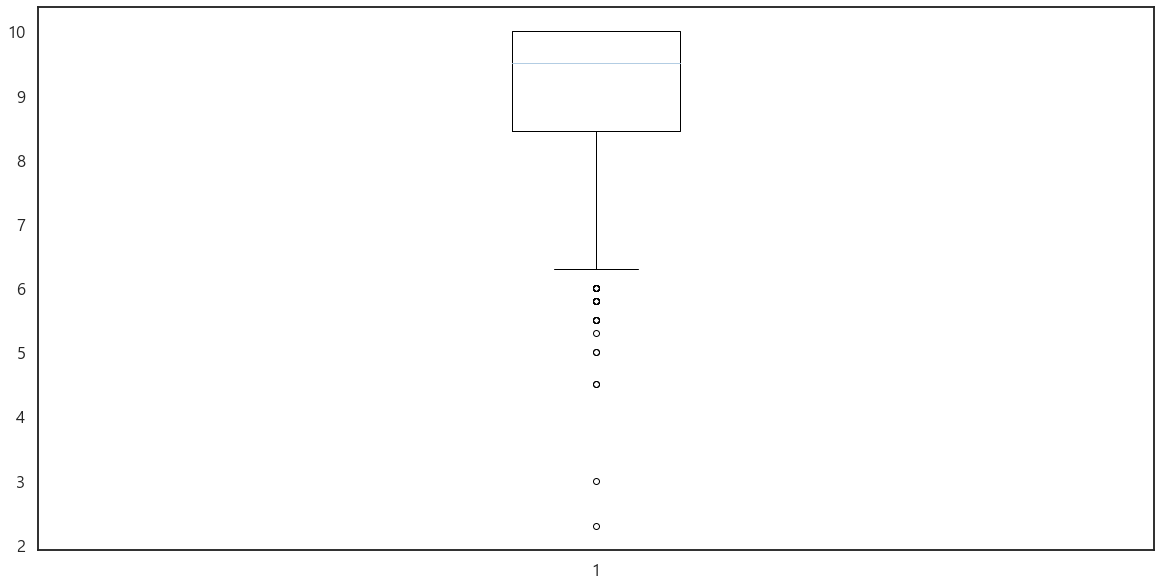

In [9]:
region= df[df['adress'] == '인천']
plt.boxplot(region.stars)

In [10]:
df_more6 = region[region['stars'] > 8.3]
print(df_more6.shape)
df_more6.head()

(750, 4)


,hospital,stars,reviews,adress
62,김성남한의원,10.0,동네였는데 한번도 가볼 생각을 못하다가 어깨에 담이 걸려서 움직이는게 불편해서 갔는...,인천
63,김성남한의원,10.0,재방문의사잇음아픈 곳을 잘 만져주시고 친절하게 진료를 잘 봐주셔서 너무 만족스러웠습...,인천
140,백제한의원,10.0,친절하시고 두루뭉실해서 진료받을때도 상담 잘 해주셨어요 아파서 간건데 넘 잘 온거 같아요,인천
165,원당한의원,10.0,조아요 다음에도 또 갈게요원장 선생님 좋았어요 상담 할때 칠절하게 응대해 주시고 설...,인천
184,국승민한의원,9.8,아는지인이 너무 좋다고 추천을 하길래 방문을 하게되었습니다 집근처였는데 솔직히 있는...,인천


In [11]:
from konlpy.tag import Okt
okt = Okt()

In [12]:
def make_noun(x):
    x = okt.nouns(x)
    return x

In [13]:
df_more6['reviews'] = df_more6['reviews'].apply(make_noun)
for_network = df_more6.copy()
df_more6['reviews'].head()

C:\Users\yukir\AppData\Local\Temp/ipykernel_15304/3817455113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_more6['reviews'] = df_more6['reviews'].apply(make_noun)


62        [동네, 한번, 생각, 어깨, 담, 생각, 병원, 부도, 의사, 쌤, 증상, 완화]
63     [재, 방문, 의사, 곳, 진료, 다음, 번, 재, 방문, 의사, 동네, 제일, 비...
140                                   [두루, 뭉, 진료, 때, 상담]
165    [다음, 또, 원장, 선생님, 상담, 때, 절하, 응대, 주시, 설명, 이해, 말씀...
184    [추천, 방문, 집, 근처, 입구, 시설, 좀, 드, 느낌, 저, 소화, 불량, 방...
Name: reviews, dtype: object

In [14]:
# 여기서부터 조심해서 네트워크 해보기
df_more6['reviews']  = [" ".join(review) for review in df_more6['reviews'].values]
df_more6['reviews'].head() 

C:\Users\yukir\AppData\Local\Temp/ipykernel_15304/853035387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_more6['reviews']  = [" ".join(review) for review in df_more6['reviews'].values]


62                     동네 한번 생각 어깨 담 생각 병원 부도 의사 쌤 증상 완화
63     재 방문 의사 곳 진료 다음 번 재 방문 의사 동네 제일 비용 직원 시설 환경 시간...
140                                         두루 뭉 진료 때 상담
165    다음 또 원장 선생님 상담 때 절하 응대 주시 설명 이해 말씀 앞 치료 진행 설명 ...
184    추천 방문 집 근처 입구 시설 좀 드 느낌 저 소화 불량 방문 증상 한의원 방문 한...
Name: reviews, dtype: object

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer = 'word', # 캐릭터 단위로 벡터화 할 수도 있습니다.
                             tokenizer = None, # 토크나이저를 따로 지정해 줄 수도 있습니다.
                             preprocessor = None, # 전처리 도구
                             stop_words = None, # 불용어 nltk등의 도구를 사용할 수도 있습니다.
                             min_df = 2, # 토큰이 나타날 최소 문서 개수로 오타나 자주 나오지 않는 특수한 전문용어 제거에 좋습니다. 
                             ngram_range=(1, 6), # BOW의 단위 갯수의 범위를 지정합니다.
                             max_features = 2000 # 만들 피처의 수, 단어의 수
                            )
vectorizer

TfidfVectorizer(max_features=2000, min_df=2, ngram_range=(1, 6))

In [16]:
# df['covid'] 만 벡터화 합니다.
feature_vector = vectorizer.fit_transform(df_more6['reviews'])
feature_vector.shape

(750, 2000)

In [17]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

2000


['가게',
 '가게 병원',
 '가게 원장',
 '가게 체질',
 '가게 한의원',
 '가격',
 '가격 다른',
 '가격 다른 한의원',
 '가격 매우',
 '가격 사천원']

In [18]:
pd.DataFrame(feature_vector[:].toarray(), columns=vocab).head()

,가게,가게 병원,가게 원장,가게 체질,가게 한의원,가격,가격 다른,가격 다른 한의원,가격 매우,가격 사천원,가격 사천원 정도,가격 생각,가격 저렴,가격 정도,가격 조금,가격 진짜,가격 환자,가격 환자 매우,가격 환자 매우 직원,가격 환자 매우 직원 시설,가격 환자 매우 직원 시설 한의원,가격 효과,가기,가끔,가도,가라,가량,가려움증,가면,가보,가야,가요,가장,가족,가족 원장,가지,가지 진료,간곳,간다,간석역,간호,간호 선생님,간호사,간호사 계속,간호사 모두,간호사 모두 병원,간호사 모두 설명,간호사 물리치료,간호사 병원,간호사 분도,...,환절기,회복,회복 도움,회사,회사 근처,회사 근처 한의원,효과,효과 간호사,효과 계속,효과 계속 방문,효과 계속 방문 환자,효과 계속 방문 환자 모이,효과 계속 방문 환자 모이 어가,효과 다른,효과 다음,효과 다음 방문,효과 대박,효과 병원,효과 보고,효과 보지,효과 부작용,효과 상담,효과 생각,효과 설명,효과 설명 가격,효과 설명 가격 환자,효과 설명 가격 환자 매우,효과 설명 가격 환자 매우 직원,효과 시설,효과 약도,효과 예약,효과 원래,효과 원장,효과 원장 진료,효과 의사,효과 전체,효과 정말,효과 조금,효과 처음,효과 최고,효과 치료,효과 크게,효과 편이,효과 한의원,효율,후기,후기 작성,후유증,후유증 방문,훈남
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.151447,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.144175,0.0,0.0,0.0,0.0,0.0,0.256235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# 위에서 구한 단어벡터를 더하면 단어가 전체에서 등장하는 횟수를 알 수 있습니다.
# 벡터화 된 피처를 확인해 봄
# Bag of words 에 몇 개의 단어가 들어있는지 확인
# 
dist = np.sum(feature_vector, axis=0)
    
df_freq = pd.DataFrame(dist, columns=vocab)
print(df_freq.shape)
df_freq.to_excel('df_freq.xlsx', encoding= 'utf-8')

(1, 2000)


In [20]:
# 행과 열의 축을 T로 바꿔주고 빈도수로 정렬합니다.
df_freq.T.sort_values(by=0, ascending=False).head(100)

,0
치료,41.768988
진료,35.756552
한의원,33.610436
방문,31.376031
선생님,30.183608
...,...
동안,5.122769
주시,5.093447
위해,5.065247
안마,5.005017


In [21]:
# ["course", "freq"] 라는 컬럼명을 주어 위에서 만든 데이터프레임을 변환합니다.
df_freq_T = df_freq.T.reset_index()
df_freq_T.columns = ["words", "freq"]
df_freq_T.tail()
# df_freq_T.to_excel('df_freq_T.xlsx', encoding= 'utf-8')

,words,freq
1995,후기,1.021556
1996,후기 작성,0.496817
1997,후유증,1.731369
1998,후유증 방문,0.856063
1999,훈남,0.606502


In [22]:
# 3개의 ngram과 빈도수로 역순 정렬을 하게 되면 빈도수가 높고, ngram수가 많은 순으로 정렬이 됨 
# 여기에서 drop_duplicates로 중복을 삭제 합니다.
print(df_freq_T.shape)
df_use = df_freq_T.drop_duplicates()
print(df_use.shape)

(2000, 2)
(2000, 2)


In [23]:
# 빈도수로 정렬을 하고 어떤 강좌가 댓글에서 가장 많이 언급되었는지 봅니다.
df_use = df_use.sort_values(by="freq", ascending=False)
df_use.head(20)

,words,freq
1587,치료,41.768988
1324,진료,35.756552
1771,한의원,33.610436
593,방문,31.376031
778,선생님,30.183608
644,병원,29.658072
1031,원장,29.464046
814,설명,25.566458
1274,직원,21.939473
1077,의사,20.763009


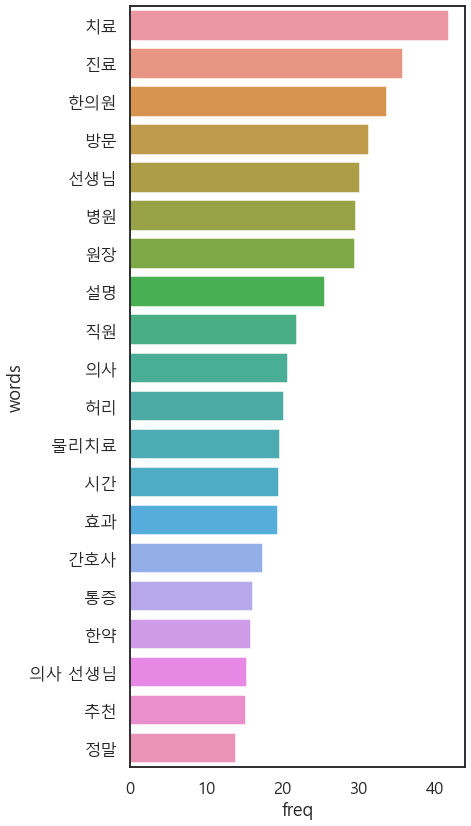

In [24]:
import seaborn as sns
plt.rc('font', family='Malgun Gothic') 

plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(6,14))
ax = sns.barplot(x = 'freq', y = 'words', 
                 data = df_use.sort_values(by = 'freq', 
                                               ascending = False).head(20))
# ax.set(xlabel = 'Overall', ylabel = 'Pokemon')
# plt.savefig('covid2_frequency.png')
plt.show()


In [25]:
words_v2 = []

for num, i in enumerate (df_use.words):
  words_v2.append((i, int(df_use.freq[num])))

words_clean = words_v2.copy()

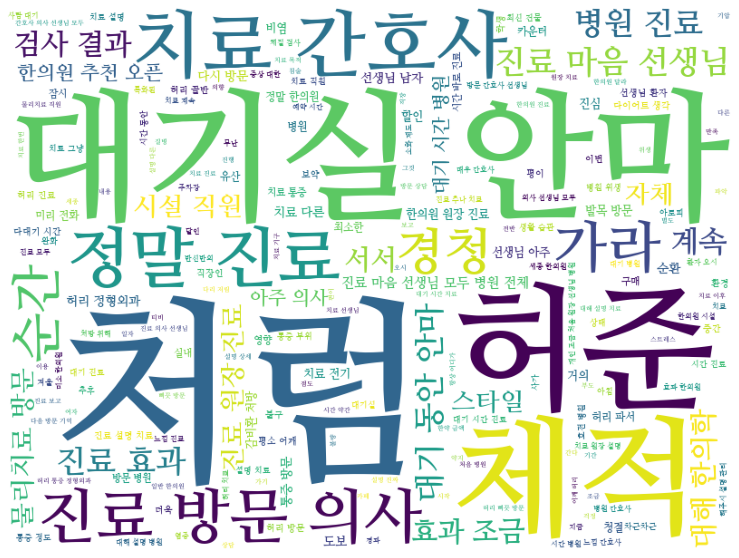

In [27]:
#불용어
from wordcloud import STOPWORDS
from wordcloud import WordCloud


mystopwords = set(STOPWORDS)
mystopwords.add('치료')
mystopwords.update(['설명의사','한의원'])


#워드클라우드. #폰트 경로설정 가장 중요


wordcloud = WordCloud(font_path="C:\\Users\\yukir\\Documents\\Monicas_workspace\\Korea_medicine\\NanumMyeongjoBold.ttf",
                      stopwords = mystopwords,
                      background_color='white',
                      width=800,
                      height=600)

# print(dict(words_v2))

cloud = wordcloud.generate_from_frequencies(dict(words_clean))
plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [ ]:
for i in region.reviews:
    if '처럼' in i:
        print('-', i)

In [ ]:
new_word_freq = sorted(words_clean, key=lambda aaa:aaa[1])
del new_word_freq[-2]
new_word_freq[-10:]

[('원장 직접', 1438),
 ('불량', 1626),
 ('며칠', 1735),
 ('주로', 2033),
 ('위주', 2316),
 ('손님', 2446),
 ('실장', 2610),
 ('소화', 2877),
 ('마스크', 3091),
 ('의사 선생님 치료', 5018)]

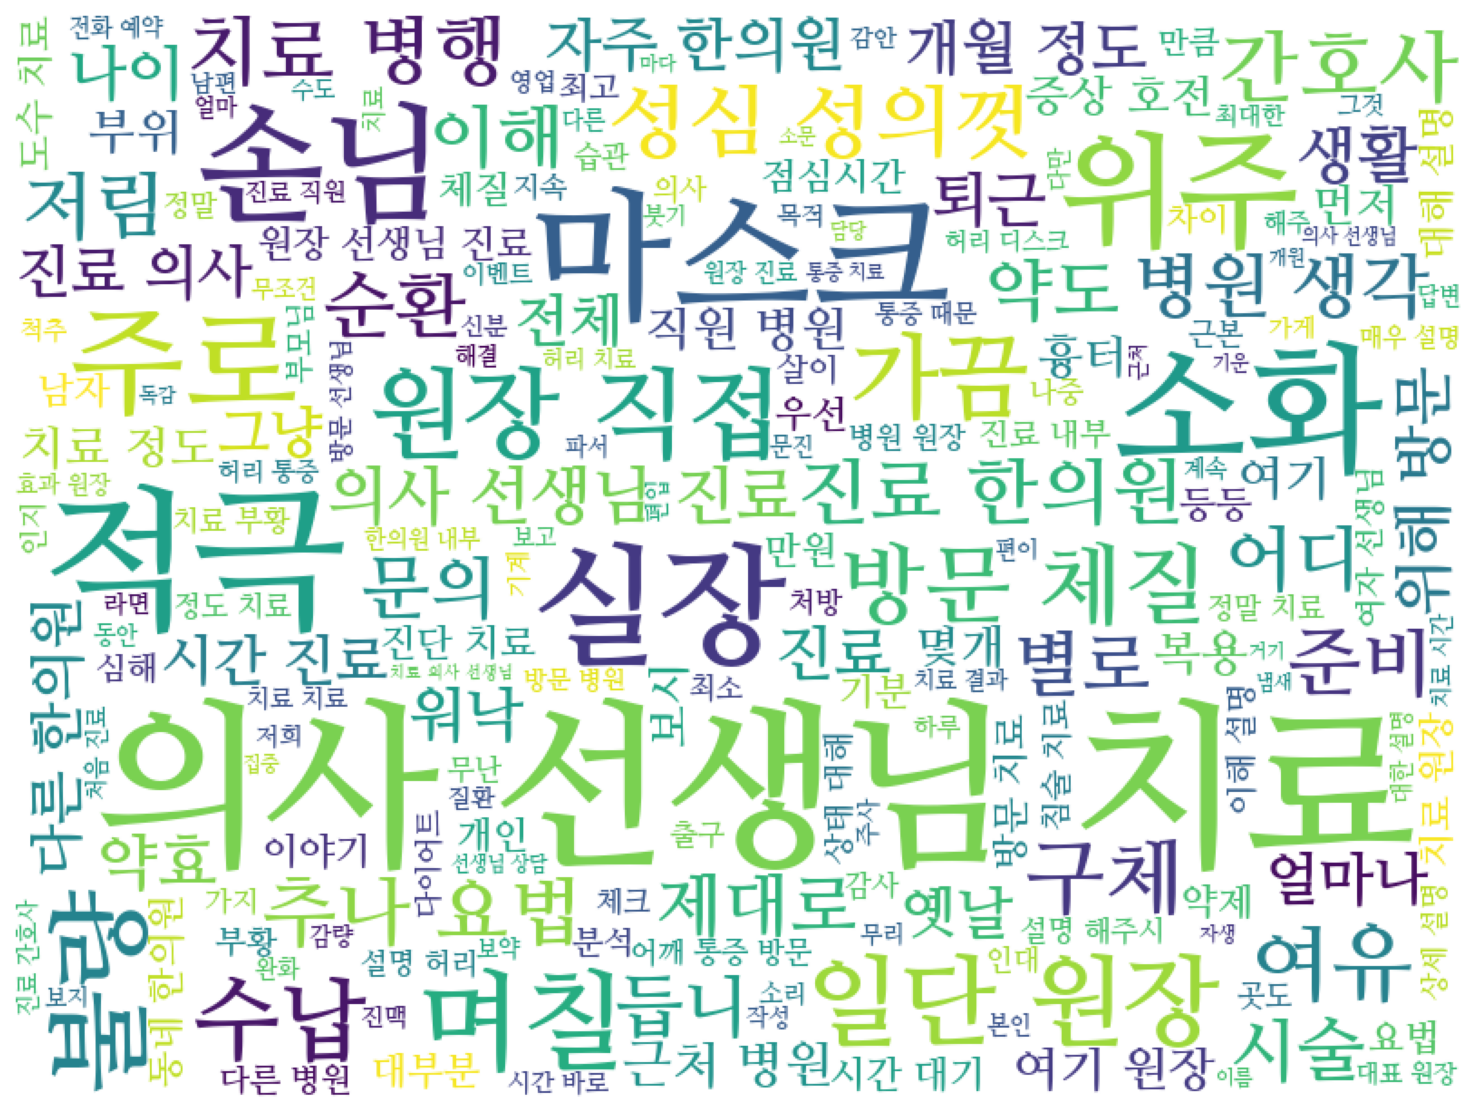

In [ ]:
#불용어
from wordcloud import STOPWORDS
from wordcloud import WordCloud


mystopwords = set(STOPWORDS)
mystopwords.add('치료')
mystopwords.update(['설명의사','한의원'])


#워드클라우드. #폰트 경로설정 가장 중요


wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
                      stopwords = mystopwords,
                      background_color='white',
                      width=800,
                      height=600)

# print(dict(words_v2))

cloud = wordcloud.generate_from_frequencies(dict(words_clean))
plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow(cloud)
plt.show()

## **NETWORK**

In [29]:
for_network.head()

,hospital,stars,reviews,adress
62,김성남한의원,10.0,"[동네, 한번, 생각, 어깨, 담, 생각, 병원, 부도, 의사, 쌤, 증상, 완화]",인천
63,김성남한의원,10.0,"[재, 방문, 의사, 곳, 진료, 다음, 번, 재, 방문, 의사, 동네, 제일, 비...",인천
140,백제한의원,10.0,"[두루, 뭉, 진료, 때, 상담]",인천
165,원당한의원,10.0,"[다음, 또, 원장, 선생님, 상담, 때, 절하, 응대, 주시, 설명, 이해, 말씀...",인천
184,국승민한의원,9.8,"[추천, 방문, 집, 근처, 입구, 시설, 좀, 드, 느낌, 저, 소화, 불량, 방...",인천


In [30]:
network_an = []

for i in for_network.reviews:
    if '대기실' in i:
        network_an.append(i)
    if '처럼' in i :
        network_an.append(i)
    if '안마' in i :
        network_an.append(i)
    if '허준' in i:
        network_an.append(i)
    if '체적' in i:
        network_an.append(i)
    if '경청' in i:
        network_an.append(i)
    if '정말' in i:
        network_an.append(i)
    if '순간' in i:
        network_an.append(i)
    if '마음' in i:
        network_an.append(i)
    if '치료' in i:
        network_an.append(i)
    if '간호사' in i:
        network_an.append(i)
 
network_an_df = pd.DataFrame({'reviews': network_an})
print(network_an_df.shape)
network_an_df.head()

(615, 1)


,reviews
0,"[다음, 또, 원장, 선생님, 상담, 때, 절하, 응대, 주시, 설명, 이해, 말씀..."
1,"[다음, 또, 원장, 선생님, 상담, 때, 절하, 응대, 주시, 설명, 이해, 말씀..."
2,"[티비, 매스컴, 우선, 상담, 꽤, 몸, 자신, 상태, 치료, 치료, 몸, 교정,..."
3,"[길, 방, 병원, 구월동, 때, 송, 윤경, 교수, 사람, 재활, 의학과, 교수,..."
4,"[길, 방, 병원, 구월동, 때, 송, 윤경, 교수, 사람, 재활, 의학과, 교수,..."


In [32]:
from apyori import apriori
result = (list(apriori(network_an_df.reviews, min_support = 0.03)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['support'] >= 0.03)].sort_values(by='support', ascending = False)
df.head()

,items,support,ordered_statistics,length
137,(치료),0.717073,"[((), (치료), 0.7170731707317073, 1.0)]",1
139,(침),0.565854,"[((), (침), 0.5658536585365853, 1.0)]",1
149,(한의원),0.429268,"[((), (한의원), 0.4292682926829268, 1.0)]",1
964,"(치료, 침)",0.422764,"[((), (치료, 침), 0.42276422764227645, 1.0), ((치료...",2
126,(진료),0.422764,"[((), (진료), 0.42276422764227645, 1.0)]",1


In [33]:
network_df = df.copy()
df_network = network_df[network_df['length']==2]
df_network.head()

,items,support,ordered_statistics,length
964,"(치료, 침)",0.422764,"[((), (치료, 침), 0.42276422764227645, 1.0), ((치료...",2
973,"(치료, 한의원)",0.295935,"[((), (치료, 한의원), 0.2959349593495935, 1.0), ((치...",2
933,"(치료, 진료)",0.294309,"[((), (치료, 진료), 0.2943089430894309, 1.0), ((진료...",2
571,"(치료, 방문)",0.284553,"[((), (치료, 방문), 0.2845528455284553, 1.0), ((방문...",2
706,"(선생님, 치료)",0.273171,"[((), (선생님, 치료), 0.2731707317073171, 1.0), ((선...",2


In [34]:
index= []

for num, i in enumerate (df_network['items']):
    if '대기실' in i:
        index.append(num)
    if '처럼' in i:
        index.append(num)
    if '안마' in i:
        index.append(num)
    if '허준' in i:
        index.append(num)
    if '체적' in i:
        index.append(num)
    if '경청' in i:
        index.append(num)
    if '정말' in i:
        index.append(num)
    if '순간' in i:
        index.append(num)
    if '마음' in i:
        index.append(num)
    if '치료' in i:
        index.append(num)
    if '간호사' in i:
        index.append(num)

In [35]:
net_an = df_network.iloc[index]
net_an.head()

,items,support,ordered_statistics,length
964,"(치료, 침)",0.422764,"[((), (치료, 침), 0.42276422764227645, 1.0), ((치료...",2
973,"(치료, 한의원)",0.295935,"[((), (치료, 한의원), 0.2959349593495935, 1.0), ((치...",2
933,"(치료, 진료)",0.294309,"[((), (치료, 진료), 0.2943089430894309, 1.0), ((진료...",2
571,"(치료, 방문)",0.284553,"[((), (치료, 방문), 0.2845528455284553, 1.0), ((방문...",2
706,"(선생님, 치료)",0.273171,"[((), (선생님, 치료), 0.2731707317073171, 1.0), ((선...",2


In [36]:
#그래프로 표현
import networkx as nx
G = nx.Graph()
ar = (net_an['items'])
G.add_edges_from(ar)

In [37]:
#페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 1000 * (nsize - min(nsize) / (max(nsize)-min(nsize)))

C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


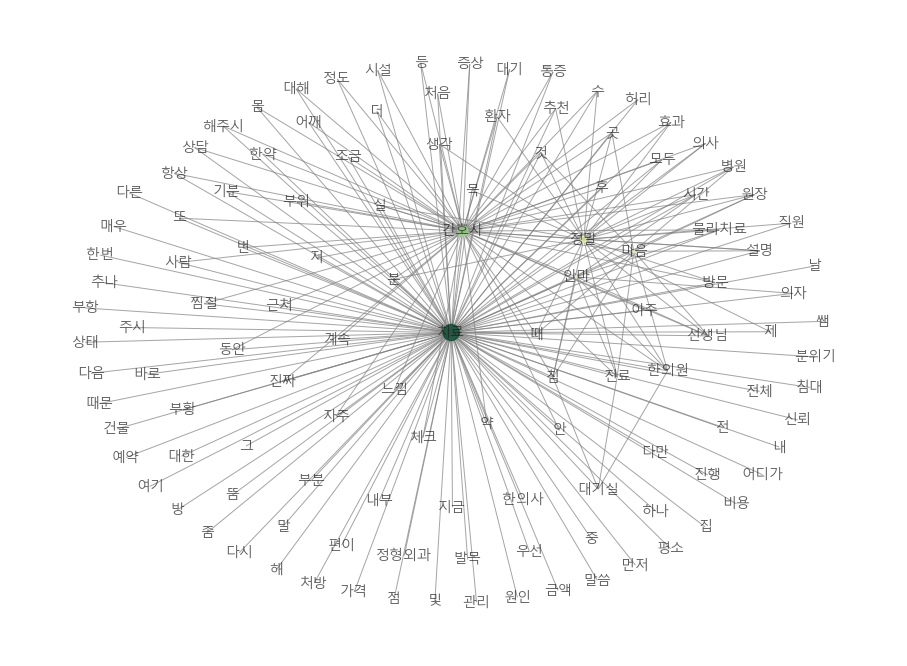

In [38]:
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

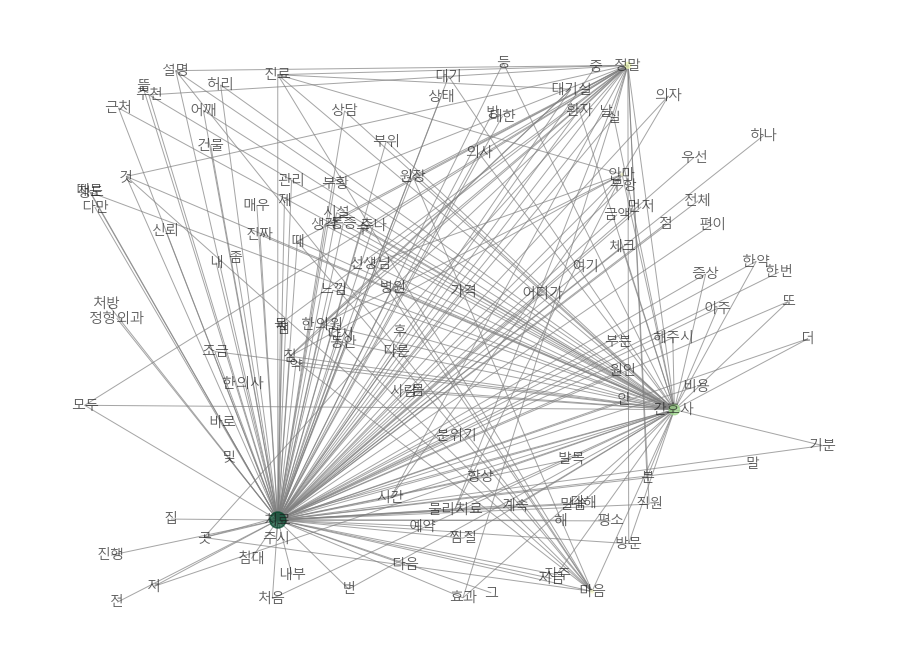

In [39]:
pos = nx.random_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

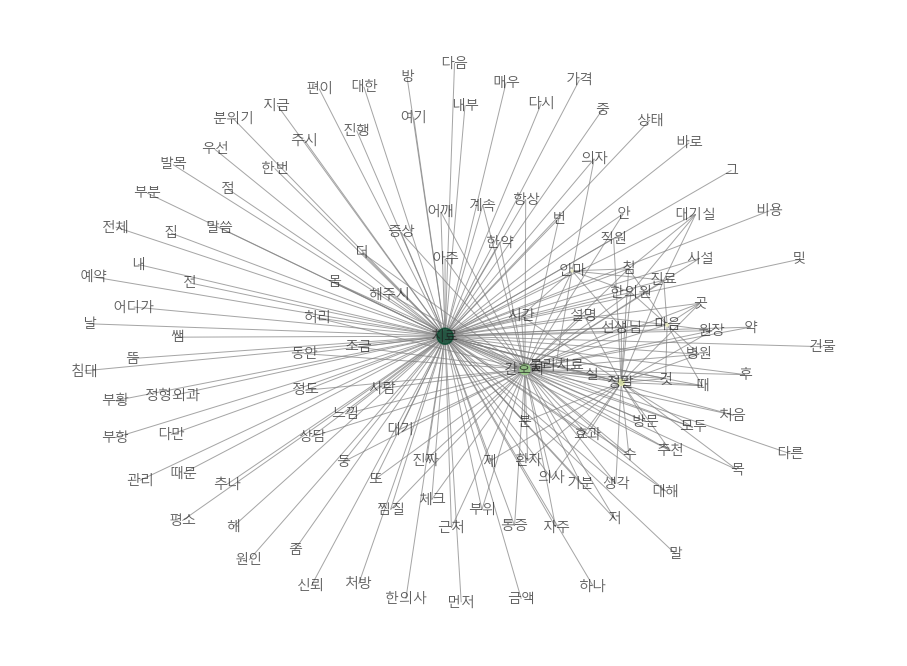

In [40]:
pos = nx.spring_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

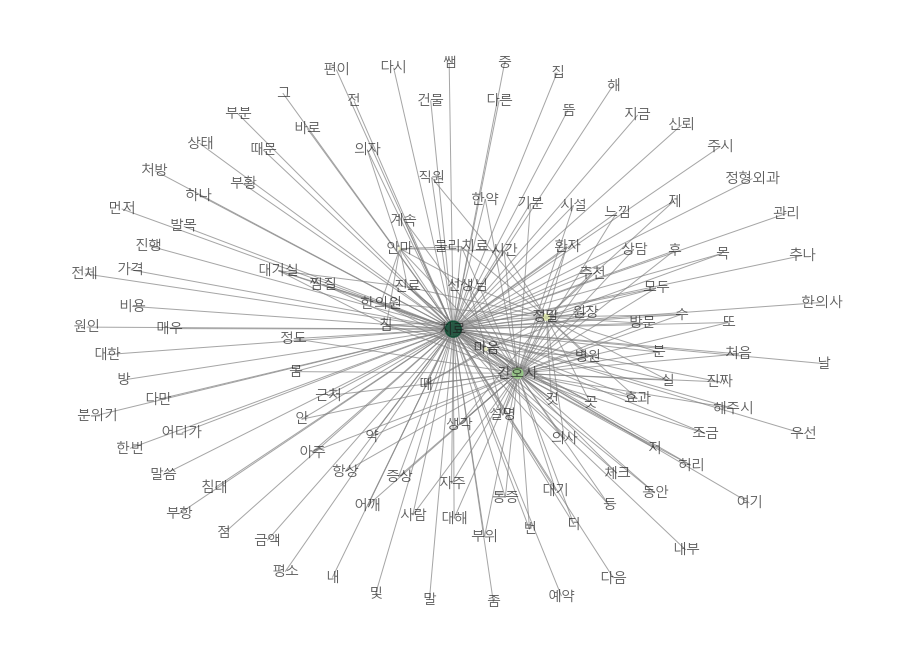

In [41]:
pos = nx.fruchterman_reingold_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)